In [115]:
# -*- coding: utf-8 -*-

## Packages

In [73]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm                                                     # pruebas estadisticas
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import pandas as pd   
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn import preprocessing

# Librerias ajustes de distribuciones

from scipy import stats
import seaborn as sns
from seaborn_qqplot import pplot                          # Validación de normalidad grafico Q-Q
# import pandas as pd
# import numpy as np
import tqdm
import inspect
import warnings
warnings.filterwarnings('ignore')


# Librerias - Cluster Jerarquico

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from mpl_toolkits.mplot3d import Axes3D

# LIbreria metodo del codo

from sklearn.cluster import KMeans

# Coeficiente de silueta

from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Organizacion de datos

In [74]:
# Identifiacion formato de datos

file = open('basketball.dat', 'r').read()

In [75]:
# Organizacion del dataset

df = pd.read_table("basketball.dat", sep="\n")                              # Carga de datas división por observaciones \n
df = df.drop([0, 1, 2, 3, 4, 5, 6],axis=0)                                  # Eliminación filas con nombres de columnas

df = df.rename(columns={'@relation basketball':'data'})                     # Cambio del nombre de la columna

df[['assists_per_minuteReal','heightInteger','time_playedReal','ageInteger','points_per_minuteReal']]=df.data.str.split(',',expand=True)   # Separación de columnas

df = df.drop(['data'],axis=1)                                                     # Eliminación 1ra columna no necesaria

In [76]:
# validación de datos

display(df.head())
display(df.dtypes)


,assists_per_minuteReal,heightInteger,time_playedReal,ageInteger,points_per_minuteReal
7,0.0888,201,36.02,28,0.5885
8,0.1399,198,39.32,30,0.8291
9,0.0747,198,38.8,26,0.4974
10,0.0983,191,40.71,30,0.5772
11,0.1276,196,38.4,28,0.5703


assists_per_minuteReal    object
heightInteger             object
time_playedReal           object
ageInteger                object
points_per_minuteReal     object
dtype: object

In [77]:
# Ajuste tipos de datos

df['assists_per_minuteReal'] = df['assists_per_minuteReal'].astype('float64')
df['heightInteger'] = df['heightInteger'].astype('int')
df['time_playedReal'] = df['time_playedReal'].astype('float64')
df['ageInteger'] = df['ageInteger'].astype('int')
df['points_per_minuteReal'] = df['points_per_minuteReal'].astype('float64')


# EDA - Analisis exploratorio de datos

In [78]:
print('Cantidad de Filas y columnas:',df.shape)
print('Nombre columnas:',df.columns)

Cantidad de Filas y columnas: (96, 5)
Nombre columnas: Index(['assists_per_minuteReal', 'heightInteger', 'time_playedReal',
       'ageInteger', 'points_per_minuteReal'],
      dtype='object')


In [79]:
df.info()                                                   # Tipos de datos y validación de información nula

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 7 to 102
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   assists_per_minuteReal  96 non-null     float64
 1   heightInteger           96 non-null     int32  
 2   time_playedReal         96 non-null     float64
 3   ageInteger              96 non-null     int32  
 4   points_per_minuteReal   96 non-null     float64
dtypes: float64(3), int32(2)
memory usage: 3.8 KB


In [80]:
df.head(10)

,assists_per_minuteReal,heightInteger,time_playedReal,ageInteger,points_per_minuteReal
7,0.0888,201,36.02,28,0.5885
8,0.1399,198,39.32,30,0.8291
9,0.0747,198,38.80,26,0.4974
10,0.0983,191,40.71,30,0.5772
11,0.1276,196,38.40,28,0.5703
12,0.1671,201,34.10,31,0.5835
13,0.1906,193,36.20,30,0.5276
14,0.1061,191,36.75,27,0.5523
15,0.2446,185,38.43,29,0.4007
16,0.1670,203,33.54,24,0.4770


In [81]:
df.describe()

,assists_per_minuteReal,heightInteger,time_playedReal,ageInteger,points_per_minuteReal
count,96.000000,96.000000,96.000000,96.000000,96.000000
mean,0.161289,189.875000,25.944375,27.739583,0.420268
std,0.059793,6.960414,8.621110,3.325325,0.108863
min,0.049400,160.000000,10.080000,22.000000,0.159300
25%,0.109825,185.000000,18.852500,25.000000,0.338425
50%,0.158400,191.000000,25.710000,27.000000,0.428250
75%,0.209475,196.000000,33.935000,30.000000,0.483075
max,0.343700,203.000000,40.710000,37.000000,0.829100


<AxesSubplot:xlabel='points_per_minuteReal'>

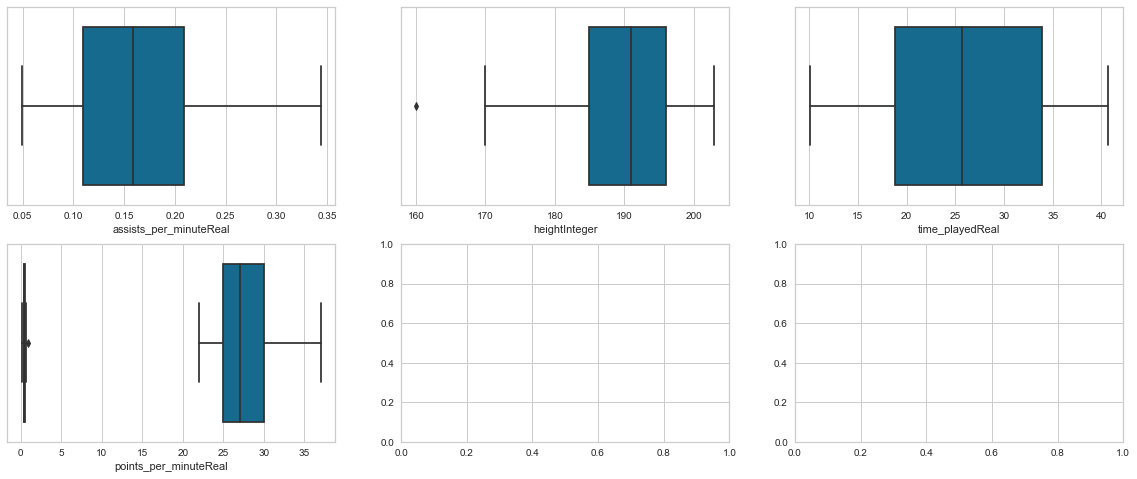

In [82]:
# Validación datos atipicos

fig, axes = plt.subplots(2, 3, figsize=(20,8))
sns.boxplot(x=df["assists_per_minuteReal"], ax=axes[0,0])
sns.boxplot(x=df["heightInteger"], ax=axes[0,1])
sns.boxplot(x=df["time_playedReal"], ax=axes[0,2])
sns.boxplot(x=df["ageInteger"], ax=axes[1,0])
sns.boxplot(x=df["points_per_minuteReal"], ax=axes[1,0])

In [83]:
# Exclusión de registro en "heightInteger" outier

df_mask=df['heightInteger']==160
filtered_df = df[df_mask]
print(filtered_df)



    assists_per_minuteReal  heightInteger  time_playedReal  ageInteger  \
76                  0.2547            160            34.55          28   

    points_per_minuteReal  
76                 0.2894  


In [84]:
# Se elimna la fila 76 el cual contine el outlier

df = df.drop(76)

### Metodos graficos Analisis de Normalidad

#### Histograma y curva normal teorica

<AxesSubplot:xlabel='ageInteger', ylabel='Density'>

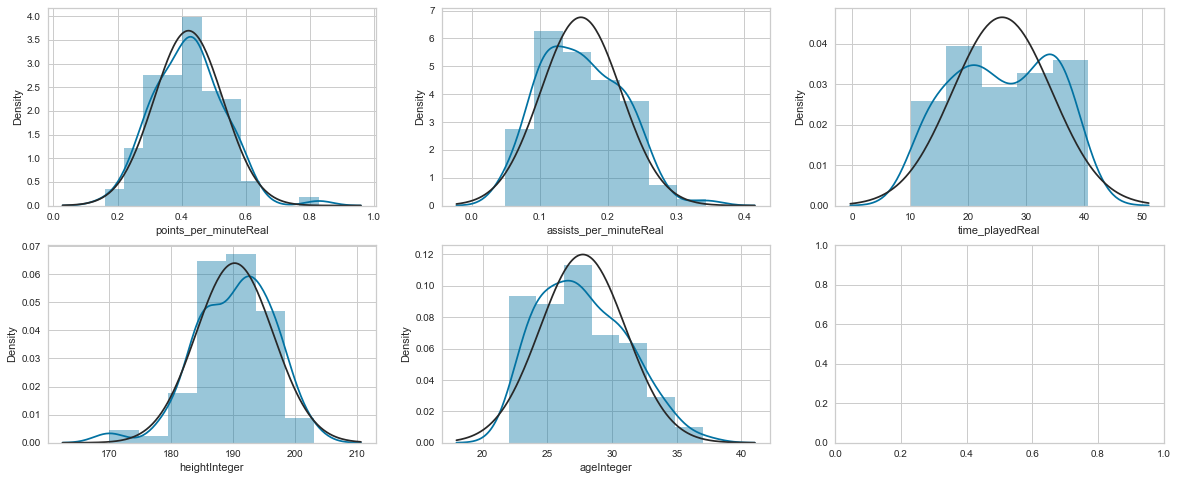

In [85]:
fig, axes = plt.subplots(2, 3, figsize=(20,8))

sns.distplot(df.points_per_minuteReal, fit=stats.norm, kde=True, ax=axes[0,0])
sns.distplot(df.assists_per_minuteReal, fit=stats.norm, kde=True, ax=axes[0,1])
sns.distplot(df.time_playedReal, fit=stats.norm, kde=True, ax=axes[0,2])
sns.distplot(df.heightInteger, fit=stats.norm, kde=True, ax=axes[1,0])
sns.distplot(df.ageInteger, fit=stats.norm, kde=True, ax=axes[1,1])


##### Descripción de graficos de distribución anteriores

- point_per_minuteReal : Tendencia a una distribución normal
- assist_per_minuteReal : Tendencia a una distribución normal
- time_playedReal : No se ajusta inicialmente a una distribución normal
- heightInteger : Tendencia a distribucion normal
- ageInteger : Tendencia a distribucion normal

#### Cuantiles teoricos Q-Q

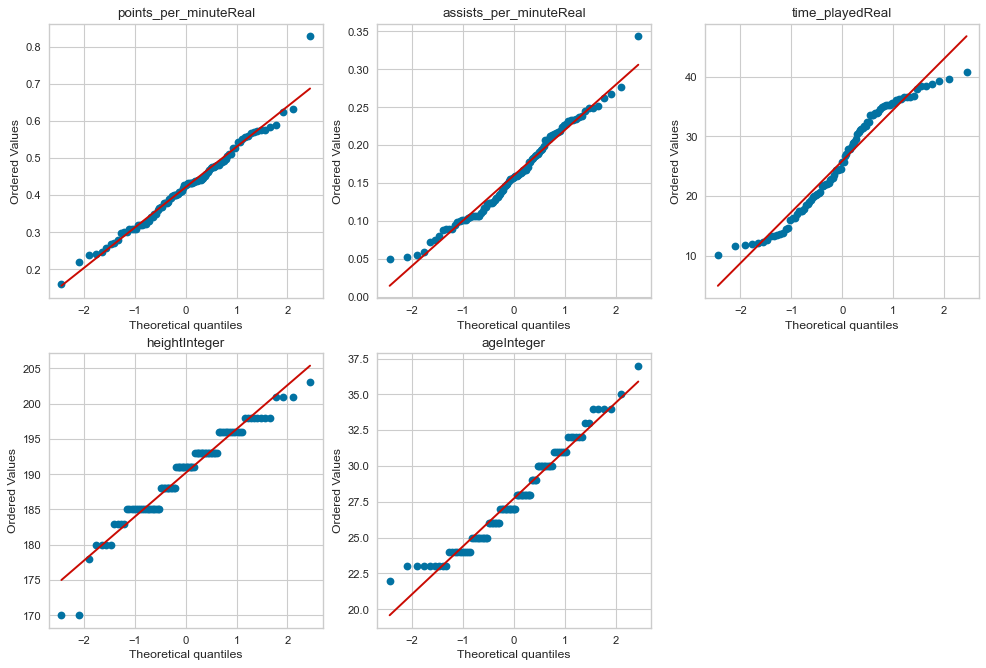

In [86]:
fig = plt.figure(figsize=[15, 10], dpi=80)

ax1 = fig.add_subplot(231)
stats.probplot(df.points_per_minuteReal, dist="norm", plot=plt)
ax1.set_title("points_per_minuteReal")
ax2 = plt.subplot(232)
stats.probplot(df.assists_per_minuteReal, dist="norm", plot=plt)
ax2.set_title("assists_per_minuteReal")
ax3 = plt.subplot(233)
stats.probplot(df.time_playedReal, dist="norm", plot=plt)
ax3.set_title("time_playedReal")
ax4 = plt.subplot(234)
stats.probplot(df.heightInteger, dist="norm", plot=plt)
ax4.set_title("heightInteger")
ax5 = plt.subplot(235)
stats.probplot(df.ageInteger, dist="norm", plot=plt)
ax5.set_title("ageInteger")

plt.show(1,1)


##### Descripción de graficos Q-Q

Gráficos comparan los cuantiles de la distribución observada con los cuantiles teóricos de una distribución normal con la misma media y desviación estándar que los datos. Cuanto más se aproximen los datos a una normal, más alineados están los puntos entorno a la recta.

- point_per_minuteReal : El grafico presenta tendencia a una distribución normal, al estar en su mayoria alineados con la recta.
- assist_per_minuteReal : No se ajusta inicialmente a una disbución normal, al presentar datos atipicos.
- time_playedReal : No se ajusta inicialmente a una distribución normal, al presentar datos atipicos.
- heightInteger : Tendencia a distribucion normal
- ageInteger : Tendencia a distribucion normal

### Metodos Analiticos Analisis de Normalidad

Los estadísticos de asimetría (Skewness) y curtosis pueden emplearse para detectar desviaciones de la normalidad. Un valor de curtosis y/o coeficiente de asimetría entre -1 y 1, es generalmente considerada una ligera desviación de la normalidad (Bulmer, 1979), (Brown, n.d.). Entre -2 y 2 hay una evidente desviación de la normal pero no extrema.

In [87]:
print('             {5}{0}{5} {5}{1}{5} {5}{2}{5} {5}{3}{5} {5}{4}{5}'.format("points_per_minuteReal","assists_per_minuteReal","time_playedReal","heightInteger","ageInteger",'|'))
print('Kurtosis --> {5}{0:21f}{5} {5}{1:22f}{5} {5}{2:15f}{5} {5}{3:13f}{5} {5}{4:10f}{5}'.format(stats.kurtosis(df.points_per_minuteReal), stats.kurtosis(df.assists_per_minuteReal),stats.kurtosis(df.time_playedReal), stats.kurtosis(df.heightInteger),stats.kurtosis(df.ageInteger),'|'))
print('Skewness --> {5}{0:21f}{5} {5}{1:22f}{5} {5}{2:15f}{5} {5}{3:13f}{5} {5}{4:10f}{5}'.format(stats.skew(df.points_per_minuteReal), stats.skew(df.assists_per_minuteReal),stats.skew(df.time_playedReal),stats.skew(df.heightInteger),stats.skew(df.ageInteger), '|'))



             |points_per_minuteReal| |assists_per_minuteReal| |time_playedReal| |heightInteger| |ageInteger|
Kurtosis --> |             0.961707| |             -0.335276| |      -1.253171| |     0.711318| | -0.539163|
Skewness --> |             0.424672| |              0.330095| |      -0.084022| |    -0.606247| |  0.421432|


### Contraste de Hipotesis

Los test Shapiro-Wilk test y D'Agostino's K-squared test son dos de los test de hipótesis más empleados para analizar la normalidad. En ambos, se considera como hipótesis nula que los datos proceden de una distribución normal.

El p-value de estos test indica la probabilidad de obtener unos datos como los observados si realmente procediesen de una población con una distribución normal con la misma media y desviación que estos. Por lo tanto, si el p-value es menor que un determinado valor (típicamente 0.05), entonces se considera que hay evidencias suficientes para rechazar la normalidad.

El test de Shapiro-Wilk se desaconseja cuando se dispone de muchos datos (más de 50) por su elevada sensibilidad a pequeñas desviaciones de la normal.

In [88]:
shapiro_test_1 = stats.shapiro(df.points_per_minuteReal)
shapiro_test_2 = stats.shapiro(df.assists_per_minuteReal)
shapiro_test_3 = stats.shapiro(df.time_playedReal)
shapiro_test_4 = stats.shapiro(df.heightInteger)
shapiro_test_5 = stats.shapiro(df.ageInteger)

_, k2_1 = stats.normaltest(df.points_per_minuteReal)
_, k2_2 = stats.normaltest(df.assists_per_minuteReal)
_, k2_3 = stats.normaltest(df.time_playedReal)
_, k2_4 = stats.normaltest(df.heightInteger)
_, k2_5 = stats.normaltest(df.ageInteger)


In [89]:
print('                    {5}{0}{5} {5}{1}{5} {5}{2}{5} {5}{3}{5} {5}{4}{5}'.format("points_per_minuteReal","assists_per_minuteReal","time_playedReal","heightInteger","ageInteger",'|'))
print('Shapiro p-valor --> {5}{0:21f}{5} {5}{1:22f}{5} {5}{2:15f}{5} {5}{3:13f}{5} {5}{4:10f}{5}'.format(shapiro_test_1[1], shapiro_test_2[1], shapiro_test_3[1],shapiro_test_4[1],shapiro_test_5[1], '|'))
print('K2      p-valor --> {5}{0:21f}{5} {5}{1:22f}{5} {5}{2:15f}{5} {5}{3:13f}{5} {5}{4:10f}{5}'.format(k2_1, k2_2, k2_3, k2_4, k2_5, '|'))



                    |points_per_minuteReal| |assists_per_minuteReal| |time_playedReal| |heightInteger| |ageInteger|
Shapiro p-valor --> |             0.177630| |              0.116908| |       0.000787| |     0.001899| |  0.007371|
K2      p-valor --> |             0.040273| |              0.341415| |       0.000000| |     0.016853| |  0.110794|


### Grafico de dispersion buscando visualizar alguna agrupación

In [92]:
# Se define como valores de entrada

X = np.array(df[["time_playedReal","assists_per_minuteReal","points_per_minuteReal"]])
y = np.array(df.heightInteger)
print('X.Shape : ', X.shape)
print('y.Shape : ', y.shape)

X.Shape :  (95, 3)
y.Shape :  (95,)


Text(0.5, 0.92, 'X = time_playedReal Y = assists_per_minuteReal Z = points_per_minuteReal')

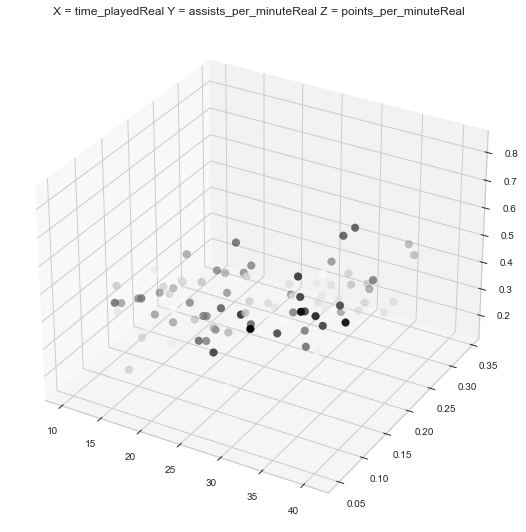

In [94]:
fig = plt.figure(figsize=[7, 7])
ax = Axes3D(fig)
colors = np.random.rand(95)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=colors, s=60)
ax.set_title(label="X = time_playedReal Y = assists_per_minuteReal Z = points_per_minuteReal")         # No se observa un agrupamiento incial

### Matriz de correlación

<AxesSubplot:>

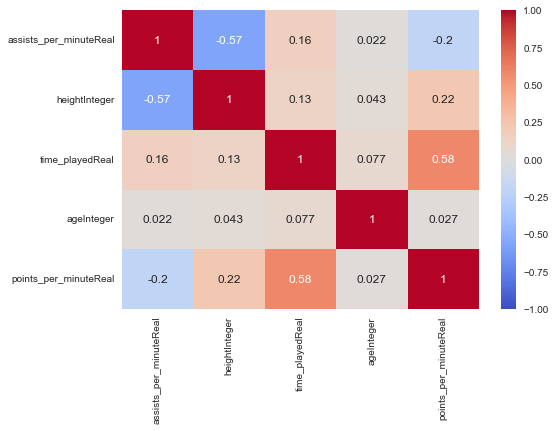

In [95]:
sns.heatmap(df.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

#### Descripción matriz de correlación

- Se observa baja correlacion entre la altura del jugador y las asistencias.
- Entre el tiempo jugado y los puntos obtenidos se presenta una correlación con tendencia a ser alta

# Definición numero de clusters

In [96]:
# Redefinición valores de entrada heightInteger y points_per_minuteReal
# Con esta redefinición de los valores de X encontramos numero de cluster y procesamos aglomerativo jerarquico y K-means.

X = df.iloc[:, [1, 4]].values

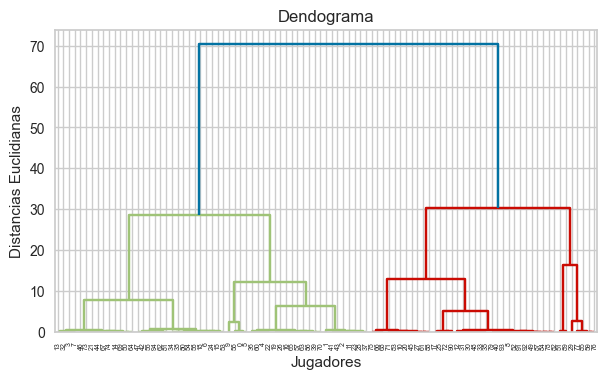

In [97]:
# Cluster jerarquico
plt.figure(figsize=[7, 4], dpi=100)
cluster_jerarquico = linkage(X, 'ward')
dendograma = sch.dendrogram(cluster_jerarquico)

plt.title('Dendograma')
plt.xlabel('Jugadores')
plt.ylabel('Distancias Euclidianas')
plt.show()

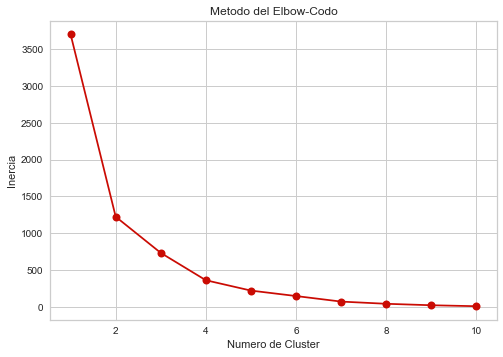

In [98]:
# Metodo del Codo para encontrar el numero optimo de clusters

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Grafica de la suma de las distancias
plt.plot(range(1, 11), wcss, "ro-", markersize=8)
plt.grid(True)
plt.title('Metodo del Elbow-Codo')
plt.xlabel('Numero de Cluster')
plt.ylabel('Inercia')
plt.show()

#### Definición de numero de Cluster

Segun el dendograma y el metodo del codo en adelante trabajamos el numero de clusters en 4. Aunque mas adelante veremos que se genera un cluster con pocas observaciones y la metricas se toma el numero de agrupamiento 3.

# Agrupamiento jerarquico - Modelo de Conectividad

Modelo de agrupamiento jerarquico aglomerativo : El clustering o agrupamiento es una técnica de aprendizaje automático no supervisado, cuyo objetivo es ordenar objetos definidos por un conjunto de variables en grupos, de forma que los elementos sean lo más homogéneos posibles.

In [101]:
# Asignacion de observaciones a cada cluster

cluster = fcluster(cluster_jerarquico, t=30, criterion='distance')            # t es la altura del corte del cluster en el dendograma, para 3 cluster.

In [102]:
cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 2, 1, 3, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 1, 2, 2, 1, 3, 2, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1,
       2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 3, 3, 2, 2, 1, 1, 2, 2, 2, 3, 1, 2,
       2, 3, 2, 2, 2, 2, 1], dtype=int32)

# Agrupamiento k-means

In [103]:
# Creando el k-Means para los 4 grupos encontrados

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

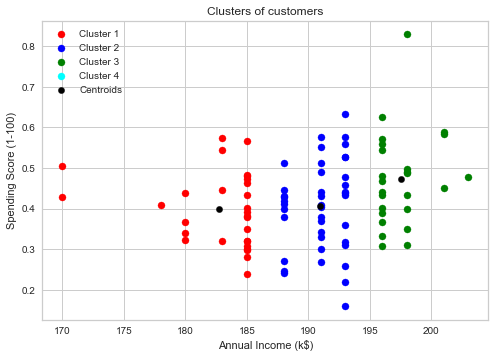

In [104]:
# Visualizacion de cluster

# Visualizacion grafica de los clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 40, c = 'black', label = 'Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Coeficiente de silueta

El coeficiente de silueta o puntuación de silueta es una métrica utilizada para calcular la bondad de una técnica de agrupación. Su valor oscila entre -1 y 1.

1: Significa que los grupos están bien separados entre sí y claramente diferenciados.

0: Significa que los conglomerados son indiferentes, o podemos decir que la distancia entre conglomerados no es significativa.

-1: significa que los clústeres se asignan de forma incorrecta.

In [106]:
print(f'Silhouette Score(n=3) K-means: {silhouette_score(X, y_kmeans)}')
print(f'Silhouette Score(n=3) Jerarquico Aglomerativo: {silhouette_score(X, cluster)}')

Silhouette Score(n=3) K-means: 0.6067420196076267
Silhouette Score(n=3) Jerarquico Aglomerativo: 0.6145610835332624


#### Descripción

Se puede inidicar que los grupos tienden a estar separados.

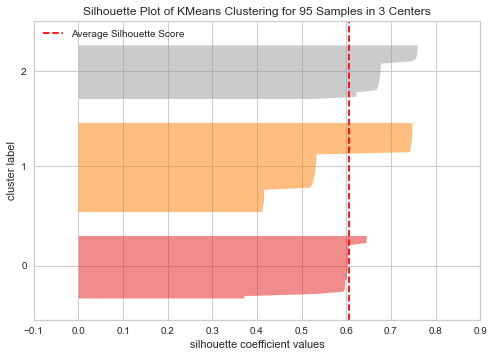

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 95 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [107]:
sil_visualizer = SilhouetteVisualizer(kmeans)
sil_visualizer.fit(X)    
sil_visualizer.show()

In [108]:
df['Clusters'] = y_kmeans   # Incluimos la categoria de los cluster en el dataset

In [109]:
df_cluster_1 = df[(df['Clusters'] == 0)] 
df_cluster_2 = df[(df['Clusters'] == 1)]  
df_cluster_3 = df[(df['Clusters'] == 2)]  


print('tamaño cluster 1 : ', len(df_cluster_1))
print('tamaño cluster 2 : ', len(df_cluster_2))
print('tamaño cluster 3 : ', len(df_cluster_3))


tamaño cluster 1 :  29
tamaño cluster 2 :  41
tamaño cluster 3 :  25


<AxesSubplot:xlabel='heightInteger'>

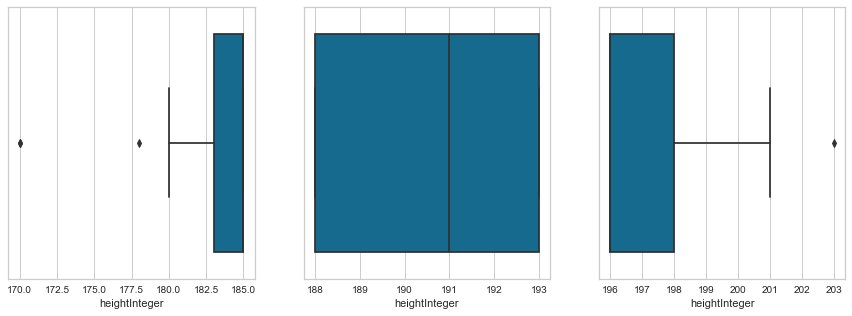

In [110]:
# Validación datos atipicos

fig, axes = plt.subplots(1, 3, figsize=(15,5))
sns.boxplot(x=df_cluster_1["heightInteger"], ax=axes[0])
sns.boxplot(x=df_cluster_2["heightInteger"], ax=axes[1])
sns.boxplot(x=df_cluster_3["heightInteger"], ax=axes[2])


# Conclusiones

- A pesar que la definición del numero de cluster indica utilizar 4 grupos, el diagrama de silueta muestra un grupo con 7 observaciones y al utilizar 3 grupos el tamaño de las siluetas tiende a ser mas homogeneo.
- Las etiquetas y debido a que se realizo la agrupación por heightInteger tenemos, manteniendo las propociones de altura
   - Cluster 1: Altos-A
   - Cluster 2: Altos-B
   - Cluster 3: Altos-C